# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [39]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"
    
#Sample Data
display(data.head(n=5))

Wholesale customers dataset has 440 samples with 6 features each.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [40]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [176,49,299]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,45640,6958,6536,7368,1532,230
1,4967,21412,28921,1798,13583,1163
2,444,879,2060,264,290,259


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

Sample 1 - **'Fresh food and salad' Market/Retailer**

Here, spending on fresh food and Grocery is significantly high. 'Fresh' food speanding is way more than median(8504) and 75 perntile (16933).

|Fresh	| Milk |	Grocery |	Frozen |	Detergents_Paper |	Delicatessen|
|-------|------|------------|----------|---------------------|--------------|
|45640  |6958  |	6536	|7368	   |1532	             |230           |


Sample 2 - **Cafe/Restaurent**

Considering the spending on Milk(more than 90% percentile), Grocery an Detergents(w.r.t median - 816 and mean -2881 ), it seems that it is a restaurent/cafe.

|Fresh	| Milk |	Grocery |	Frozen |	Detergents_Paper |	Delicatessen|
|-------|------|------------|----------|---------------------|--------------|
|4967   |21412 |	28921	|1798 	   |13583	             |1163          |

Sample 3 - **Family**

Here, spending is low(w.r.t median and 25 percentile values) in all categories. Most probably, it represents individual customer/small family.

|Fresh	| Milk |	Grocery |	Frozen |	Detergents_Paper |	Delicatessen|
|-------|------|------------|----------|---------------------|--------------|
|44     |879   |	2060 	|264 	   |290 	             |259           |


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [41]:
# Import libs
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

for id, feature_name in enumerate(list(data)):
    #print feature_name
    
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop([feature_name], axis = 1)
    dropped_col_data = data[feature_name]

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, 
                                                        dropped_col_data, 
                                                        test_size = 0.25, 
                                                        random_state = 19)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=19)
    regressor.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)

    print "Dropped Column : {:s}, Model-{:d} score : {:.2f}".format(feature_name, id+1, score)

Dropped Column : Fresh, Model-1 score : -0.25
Dropped Column : Milk, Model-2 score : -0.40
Dropped Column : Grocery, Model-3 score : 0.65
Dropped Column : Frozen, Model-4 score : -2.41
Dropped Column : Detergents_Paper, Model-5 score : 0.60
Dropped Column : Delicatessen, Model-6 score : -0.46


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**
I tried dropping all columns sequentially, trained the model using **DecisionTreeRegressor** and measured the R2_score.

|Model Ref|Dropped Column Name | R2-Score |Model Fit Status/Correlation|Is necessary ?|
|---|:--------------------|----------|:-------|:-------|
|1|Fresh               | -0.25    |failed||
|2|Milk                | -0.40    |failed||
|3|Grocery             | **0.65** |fit/High|No. It is highly correlated with one or more other features.|
|4|Frozen              | -2.41    |failed||
|5|Detergents_Paper    | **0.60** |fit/High|No. Same as above|
|6|Delicatessen        | -0.46    |failed||

'**Grocery**' and '**Detergent Papers**' are correlated with other features. These two features can't be used independently to understand customer segments. We should do PCA to convert these composite correlations to 'principal components'.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

/Users/mmukherjee/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


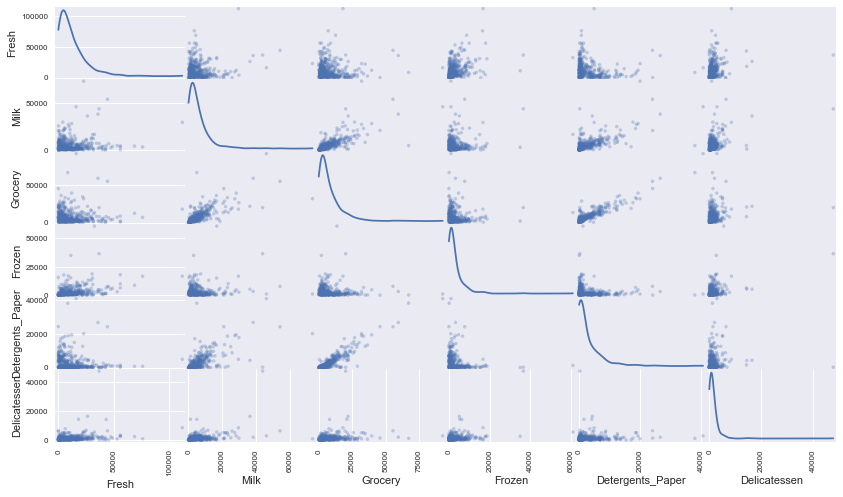

In [42]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** 

Yes, there are three pairs which exhibit quite strong correlation. 

|SequenceNo|1st Feature | 2nd Feature |Correlation Score|
|---|-------------------|-------------|-----------------|
|1  |Milk               | Grocery     | 0.73|
|2  |Milk               | Detergent_Papers     |0.66|
|3  |**Grocery**               | **Detergent_Papers**     |**0.92**|

These scores confirm the suspicions which we had mentioned in the answer of the 2nd Qts. We must do PCA to find principal components from these correlated features. 

Please find below histograms generated for 'Grocery' and 'Detergent_Papers'. All feature distributions are skewed towords right, ie mean is more than the median. 

_Reference_
[Skewness](http://www.everythingmaths.co.za/maths/grade-11/11-statistics/11-statistics-05.cnxmlplus)

Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicatessen        11.151586
dtype: float64

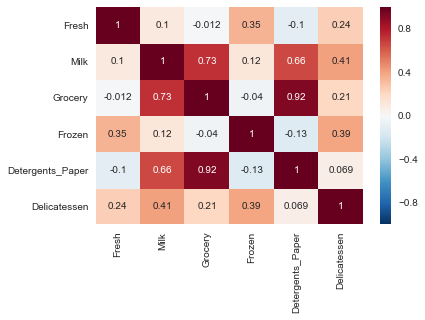

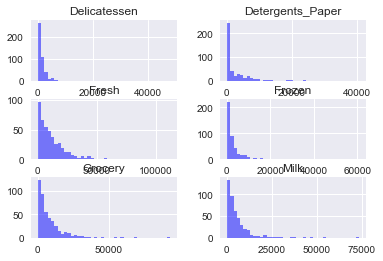

In [73]:
import seaborn as sns
sns.heatmap(data.corr(), annot=True)
data.hist(bins=40, color='b', alpha=0.5)

# Skewness per feature
pd.DataFrame.skew(data, axis=0)

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

/Users/mmukherjee/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.728540,8.847647,8.785081,8.904902,7.334329,5.438079
1,8.510571,9.971707,10.272323,7.494430,9.516574,7.058758
2,6.095825,6.778785,7.630461,5.575949,5.669881,5.556828


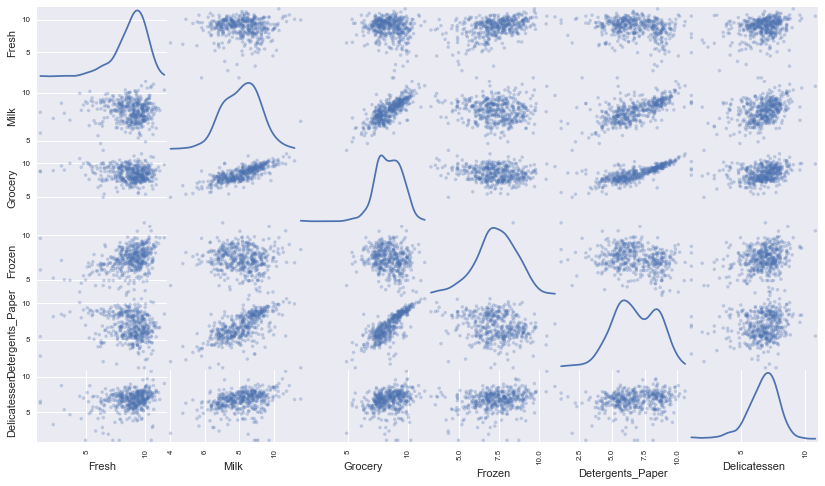

In [30]:
# TODO: Scale the data using the natural logarithm
log_data = data.apply(lambda x: np.log(x))

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.apply(lambda x: np.log(x))

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

display(log_data.head(n=3))
display(log_samples)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11789cad0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117c50150>]], dtype=object)

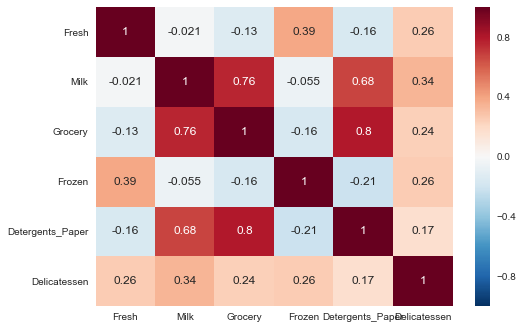

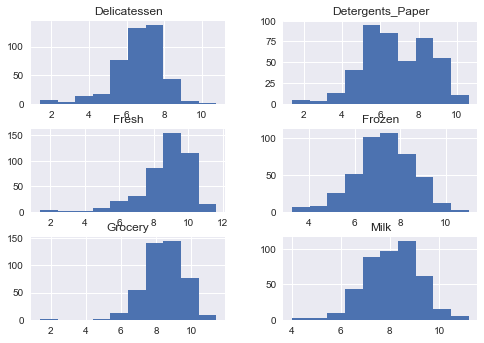

In [8]:
## Display Correlations(All Pairs) and Distributions(6 columns)
sns.heatmap(log_data.corr(), annot=True)
log_data.hist(bins=10)

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

##### Correlations still exist but got changed a bit. 

|No |1st Feature        | 2nd Feature         |<font color="blue">Prev Correlation Score</font>|<font color="green">Current Correlation Score</font>|
|---|-------------------|---------------------|----------------------|-------------------------|
|1  |Milk               | Grocery             | 0.73                 |0.76                     |
|2  |Milk               | Detergent_Papers    | 0.66                 |0.68                     |
|3  |**Grocery**        | **Detergent_Papers**| **0.92**             |0.80                     |

In [9]:
# Display the log-transformed sample data and its statistical description
display(log_samples)
display(log_samples.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.728562,8.847791,8.785234,8.905037,7.334982,5.442418
1,8.510773,9.971753,10.272358,7.494986,9.516648,7.059618
2,6.098074,6.779922,7.630947,5.579730,5.673323,5.560682


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,8.445803,8.533155,8.896179,7.326584,7.508318,6.020906
std,2.315927,1.619010,1.324196,1.669038,1.927517,0.901492
min,6.098074,6.779922,7.630947,5.579730,5.673323,5.442418
25%,7.304423,7.813856,8.208090,6.537358,6.504153,5.501550
50%,8.510773,8.847791,8.785234,7.494986,7.334982,5.560682
75%,9.619667,9.409772,9.528796,8.200012,8.425815,6.310150
max,10.728562,9.971753,10.272358,8.905037,9.516648,7.059618


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

**References**

1. [Outliers-to-drop-or-not-to-drop](http://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/)
2. [Stat_checklist_identifying_outliers](http://graphpad.com/guides/prism/6/statistics/index.htm?stat_checklist_identifying_outliers.htm)

In [76]:
outliers  = []
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    
    outliers_per_feature = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    outliers_index = outliers_per_feature.index.tolist()
    # Cumulative list of outlier indexes 
    outliers = outliers + outliers_index
    
    print "Outliers count : {:d}".format(len(outliers_per_feature.index.tolist()))
    
# OPTIONAL: Select the indices for data points you wish to remove
# Removing the data points which are considered outliers for more than one feature. In this case - 6
common_outliers = [x for x in outliers if outliers.count(x) > 1]
unique_shared_outliers = list(set(common_outliers))

# Remove the outliers, if any were specified
print "--------------------------------------"

print "Unique outliers count : {:d}, List : {:s} ".format(len(unique_shared_outliers), unique_shared_outliers)

print "Number of sample records : {:d}".format(log_data.shape[0])

# Removing all outliers instead of unique and shared datapoints(unique_shared_outliers). If I remove only the unique and shared outliers then the entire PCA representation 
# is getting changed. I don't think the outliers can change the direction(+ve to -ve) of the firest two principal components.
# I couldn't explain this. 

good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

print "Number of sample records after removing outliers : {:d}".format(good_data.shape[0])

Data points considered outliers for the feature 'Fresh':
Outliers count : 16
Data points considered outliers for the feature 'Milk':
Outliers count : 4
Data points considered outliers for the feature 'Grocery':
Outliers count : 2
Data points considered outliers for the feature 'Frozen':
Outliers count : 10
Data points considered outliers for the feature 'Detergents_Paper':
Outliers count : 2
Data points considered outliers for the feature 'Delicatessen':
Outliers count : 14
--------------------------------------
Unique outliers count : 5, List : [128, 65, 66, 75, 154] 
Number of sample records : 440
Number of sample records after removing outliers : 398


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**
In each feature distribution, there are some outliers. Since we are trying to find customer segments, so it is better to remove these outliers from main calculation, otherwise we would have distorted cluster(and its centroid).

We've added 48 entries in the _outliers_ list. There are 5 samples(original index - 128, 65, 66, 75, 154) were considered as outliers w.r.t multiple features.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

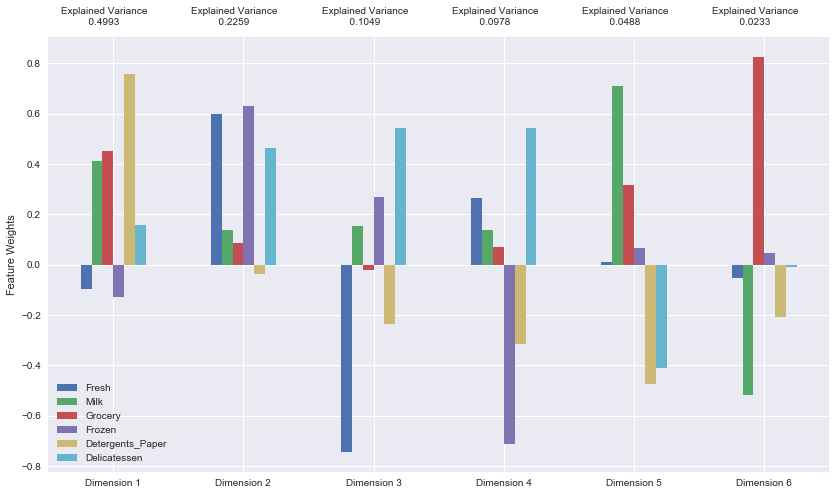

In [77]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=len(good_data.keys())).fit(good_data)

# Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

In [60]:
display(pca_results)
np.cumsum(pca.explained_variance_ratio_)

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4993,-0.0976,0.4109,0.4511,-0.1280,0.7595,0.1579
Dimension 2,0.2259,0.6008,0.1370,0.0852,0.6300,-0.0376,0.4634
Dimension 3,0.1049,-0.7452,0.1544,-0.0204,0.2670,-0.2349,0.5422
Dimension 4,0.0978,0.2667,0.1375,0.0710,-0.7133,-0.3157,0.5445
Dimension 5,0.0488,0.0114,0.7083,0.3168,0.0671,-0.4729,-0.4120
Dimension 6,0.0233,-0.0543,-0.5177,0.8267,0.0471,-0.2080,-0.0094


array([ 0.49930484,  0.7252529 ,  0.83013599,  0.92795361,  0.9767447 ,  1.        ])

**Answer:** 

- Total variance explained by the 'first' two dimensions is : 0.7252529
- Total variance explained by the 'first four' to dimensions is : 0.92795361

|Dimension Ref|	Overview|
|:-------------|:---------|
|1|	This is the most prominent principal coponent which explains **~50%** of the total data variance. It suggests that **'Milk'**, **'Grocery'** and **'Detergent paper'** are three very commpon products which are often bought together in propotional amount.|
|2	|It is the 2nd most importnat pc that explains **~23%** of the data variance. It represents a different customer segment who buy **'Fresh'**, **'Frozen'** and **'Delicatessen'** types of products in propotional amount.|
|3	|This is comparitively weak PC which explains **~10%** of the data variance. It represents the customer segment who buys **'Delicatessen'**, **'Frozen'** and **'Milk'** together(in propotional amount). It clearly emphasizes that this group rarely buy 'Fresh' food from the wholeseller.|
|4	|This also explains **~10%** of the data variance. It represents the customer segment who mainly buy **'Milk'** and **'Grocery'** and doesn't buy any **Frozen** product.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [69]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,0.2998,1.4865,-1.7066,-1.3628,1.0531,-0.2021
1,3.7428,0.2151,0.0792,-0.4946,0.5008,0.0302
2,-1.4382,-3.6579,1.0164,-0.0002,-0.3161,0.3545


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [78]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data  = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [79]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,0.2998,1.4865
1,3.7428,0.2151
2,-1.4382,-3.6579


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

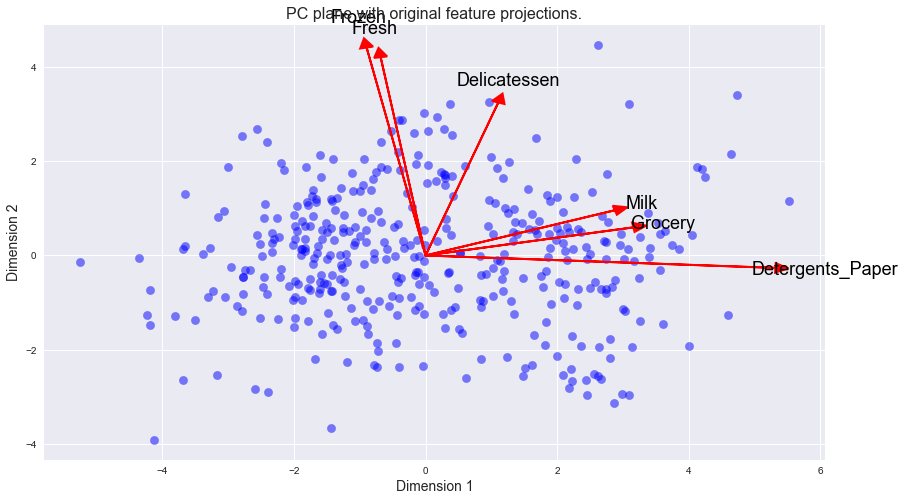

In [80]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

PN - In the first component(left), 'Frozen' and 'Fresh' are two original features that are strongly correlated.
Above scatterplot shows the association between PCA generated component to the original features. This is consistent with the result which we had observed earlier.

|Component|	Original Fretures|
|:---------|:----------------|
|1(left)|	'Milk', 'Grocery' and 'Detergent paper'|
|2(right)|	'Fresh', 'Frozen' and 'Delicatessen'|

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

**Advantages of K-Means**
- Easy	to	implement. It tries to minimize the quadratic distrance between the cluster center and neighbouring points.	
- It is quite fast but its "worst case" can be super polinomial

    According Lloyds algorithm for k-means clustering, the complexity is : O(n * K * I * d)
    where 
    - n : number of points
    - K : number of clusters
    - I : number of iterations
    - d : number of attributes
- It may produce tighter clusters than hierarchical clustering approach. 
    
**Advantages of K-Means over Gaussian Mixture Model clustering algorithm**
PN - K-means is a special case of Mixture of Gaussian, and Mixture of Gaussian is a special case of Expectation-Maximization.

Advantages:

1. It dones't assume clusters to be of any geometry and it works well with non-linear geometric distributions as well.
2. Does not bias the cluster sizes to have specific structures as does by K-Means (Circular).
3. Unlike Kmeans which focuses on the euclidean distance, GMM calculates the “weighted” distance. In GMM, a point belongs to each cluster to a different degree. This is helpful in analyzing complex cases where a point can potentially belong to multiple clusters depdning on some other dimension like time. 

**Prefrered alog w.r.t this dataset**
In this case, we are not concerned on the overlapping customer segments. Here we want to capture the high level customer segments only. That's why we have choosed K-Means over GMM.

_References_

1. [How slow is K-means](http://theory.stanford.edu/~sergei/papers/kMeans-socg.pdf)
2. [Differences between K-means and GMM](https://www.quora.com/What-is-the-difference-between-K-means-and-the-mixture-model-of-Gaussian)

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [81]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

#Testing Purpsoe : for n in range(2,9):

# TODO: Apply your clustering algorithm of choice to the reduced data 
# clusterer = GaussianMixture(n_components=2, random_state=0).fit(reduced_data)
clusterer = KMeans(n_clusters=2, random_state=0).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

print "silhouette_score : {:.3f}".format(score)

silhouette_score : 0.447


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

I tried measured the score by varing the number of clusters from 2 to 10. Here is the result. 'n_clusters' as '2' (ie. two clusters) produces the best silhouette_score.

|	n_clusters	|	silhouette_score	|
|:--------|:----------|
|	2	|	0.447358	|
|	3	|	0.364565	|
|	4	|	0.331093	|
|	5	|	0.352554	|
|	6	|	0.362863	|
|	7	|	0.3544	|
|	8	|	0.36074	|
|	9	|	0.367653	|

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

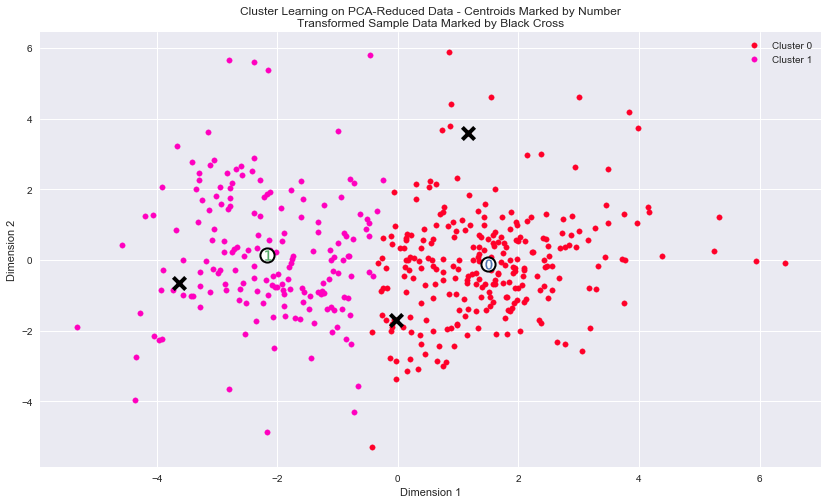

In [18]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [86]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

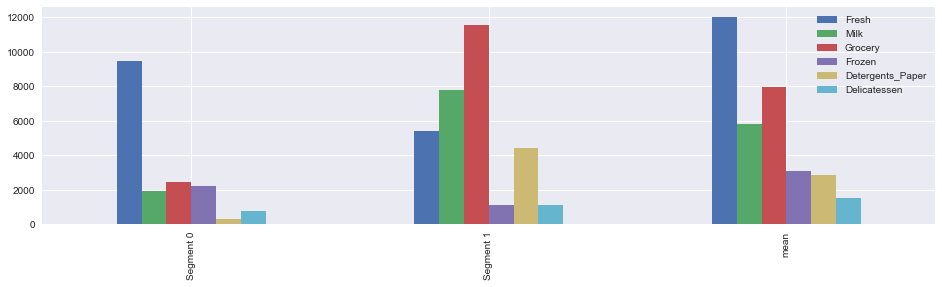

In [95]:
#Following diagram helps to visualize two cluster center and the mean data point
true_centers_with_mean =  true_centers.append(data.describe().loc['mean'])
true_centers_with_mean.plot(kind = 'bar', figsize = (16, 4))

**Answer:**

Segment 0, Avg. total purchase : 17126
Segment 1, Avg. total purchase : 31460

|	Product/Feature	|	Segment/Cluster-0	|	SegmentCluster-1	|	<font color="green">Original mean</font>	|	<font color="green">Original std</font>	|
|:------------------|:------------------|:------------------|:------------------|:------------------|
|	Fresh	|	9456	|	5423	|	12000	|	12647	|
|	Milk	|	1938	|	7790	|	5796	|	7380	|
|	Grocery	|	2449	|	11547	|	7951	|	9503	|
|	Frozen	|	2202	|	1124	|	3072	|	4855	|
|	Detergents_Paper	|	309	|	4437	|	2881	|	4768	|

- **First Segment** (Segment/Cluster-0) probably represent a '**Restaurent/Shop**' who mainly buys 'Fresh', 'Frozen' and 'Delicatessen'.
- **Second segment** (SegmentCluster-1) represent a **'medium-scale retailer'** who mainly buys 'Milk', 'Grocery' and 'Detergent paper' from the wholeseller.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [100]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
    print 'The distance between sample point {} and center of cluster {}:'.format(i, pred)
    print (samples.iloc[i] - true_centers.iloc[pred])
    print ("----------------")

Sample point 0 predicted to be in Cluster 0
The distance between sample point 0 and center of cluster 0:
Fresh               36189.0
Milk                 5020.0
Grocery              4087.0
Frozen               5168.0
Detergents_Paper     1225.0
Delicatessen         -541.0
dtype: float64
----------------
Sample point 1 predicted to be in Cluster 1
The distance between sample point 1 and center of cluster 1:
Fresh                -457.0
Milk                13632.0
Grocery             17389.0
Frozen                675.0
Detergents_Paper     9139.0
Delicatessen           27.0
dtype: float64
----------------
Sample point 2 predicted to be in Cluster 0
The distance between sample point 2 and center of cluster 0:
Fresh              -9007.0
Milk               -1059.0
Grocery             -389.0
Frozen             -1936.0
Detergents_Paper     -17.0
Delicatessen        -512.0
dtype: float64
----------------


**Answer:**

|	Sq	|	Fresh	|	Milk	|	Grocery	|	Frozen	|	Detergents_Paper	|	Delicatessen	|<font color="blue">	ClusterNo</font>	|	<font color="green">Justification</font>	|
|:------|:------|:------|:------|:------|:------|:------|:------|:------|
|	0	|	45640	|	6958	|	6536	|	7368	|	1532	|	230	|	0	|	Spending on 'Fresh', 'Frozen' is quite high and apparently correlated. As expected, it is in the left cluster(Segment 0)	|
|	1	|	4967	|	21412	|	28921	|	1798	|	13583	|	1163	|	1	|	Spending on 'Milk', 'Grocery' and 'Detergent paper' are comparitively high. It should be in cluster 1	|
|	2	|	444	|	879	|	2060	|	264	|	290	|	259	|	0	|	This is a kind of outlier w.r.t cluster 0. Considering the propotional and significant spending 'Frozen' and 'Delicatessen', it can be naively classified to segment 0	|

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** From the above analysis, we have identified the following two customer segments. 

- Segment 1 : Customer of this type buys 'Milk', 'Grocery' and 'Detergent paper' together in some propotional amount. 
- Segment 2 : This type of customer buys2 mainly buys 'Fresh', 'Frozen' and 'Delicatessen'.

The wholeseller should consider daily product delivery to the customers who belong to segment2 since this group buy Fresh foods. 

It is fine to experiment (3 days a week, evening delivery) with the first customer segment their product purchase pattern is different(doesn't include fresh or Delicatessen type of food). A subset of these customers who spend significant money on Milk(considering they need fresh milk) might get considered for the faster delivery. 

Here are a few steps which we can suggest to organize the A/B testing.

1. **Analyze existing Data:** We already identified two customer segments who buy product from this wholeseller. 

2. **Identify Goals:** Here the wholeseller wants to move away from a morning delivery service five days a week to a cheaper evening delivery service three days a week. His goal would be to leverage the low cost delivery model for most of his customers without affecting the current business(in other words, without lossing any money or not getting any complaints from his customers).

3. **Generate Hypothesis:**

    - First Segment (Segment/Cluster-0) probably represent a 'Restaurent/Shop' who mainly buys 'Fresh', 'Frozen' and 'Delicatessen'.
        - <font color="blue"> These customers need daily morning delivery. </font>

    - Second segment (SegmentCluster-1) represent a 'medium-scale retailer' who mainly buys 'Milk', 'Grocery' and 'Detergent paper' from the wholeseller.
        - <font color="blue"> These customers can opt in to the new evening (3 days a week) delivery method without having any major problem. </font>

4. **Create Variations:** Maintain both the delivery types simultaneously. 

5. **Run Experiment:** Kick off your experiment and wait for customers to participate! 
Create a list of random 100 customers from each of the segments. Try the new delivery method with these 200 customers. As per our hypothesis, this experiment should show much higher conversion from the 2nd segment ie. retailer than the first group.

_Reference_

[A/B Testing](https://vwo.com/ab-testing/)

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** 

Using unsupervised learning, we have associated a new lebel('customer segment') with each data point(annual spending on 6 products). 
We can use this labelled data to train a supervised classfier( Like LogisticRegressor, or Decision Tree) that can be used to predict the customer segment from any given estimated product spending data.


### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

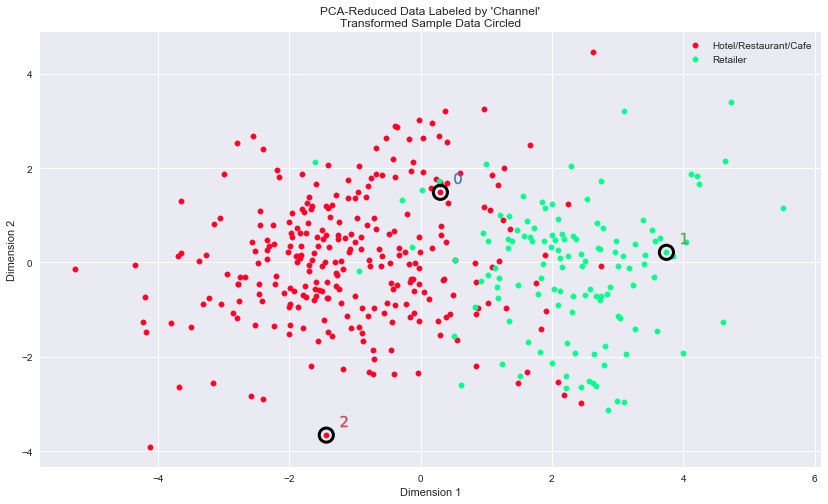

In [101]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

In [102]:
#find percentage of correctly classified customers
data = pd.read_csv("customers.csv")
data = data.drop(data.index[outliers]).reset_index(drop = True)
# might need to switch around the 0 and 1, based on your cluster seed
df = np.where(data['Channel'] == 2, 1, 0)
print "Percentage of correctly classified customers: {:.2%}".format(sum(df == preds)/float(len(preds)))

Percentage of correctly classified customers: 88.44%


**Answer:**

K-Means algorithm with 2 clusters has produced a very similar result. 
There are many points which are located close to the cluster center. These points should be considered as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution. The output of this visualization is highly consistent(**88%** correct prediction) with the same of what we produced in the above section. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.